## about Dataset

<h3> credit card clients classifier </h3>


<h1> Dataset Information </h1>

This dataset contains information on default payments, demographic factors, credit data, history of payment 

and bill statements of credit card clients.


<a href="https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset"> link dataset </a>

<h1> Table of contents </h1>

* [Upload the data for training](#upload_data)


* [data preprocessing](#data_preprocessing)

  *  <a> 1. handling miss value </a>

  *  <a> 2. impute missing value </a>

  *  <a> 3. drop duplicates </a>

  *  <a> 4. convert columns to data type </a>

  *  <a> 5. removing outliers </a>
  
  *  <a> 6. One Hot Encoder </a>



* [data visualization](#data_visualization)

  *  <a> 1. Histogram </a>

  *  <a> 2. BoxBlot </a>


* [Feature engineering](#Feature_Engineering)
  
  *  <a> 1. Backword Elimination </a>

  *  <a> 2. Pca Feature Extraction </a>

  *  <a> 3. Standard Scaler </a>
  
* [model](#model)

  *  <a> 1. linear learner </a>

  *  <a> 2. Logistic Regression </a>

  *  <a> 3. Random Forest </a>
  
  *  <a> 4. Deceision Tree </a>

  *  <a> 5. Gradiant poosting </a>

  *  <a> 6. Deep Neural Network </a>
  
* [Hyperparameter tunning](#Hyperparameter_tunning)

  *  <a> 1. Grid Search </a>

  *  <a> 2. Random Search </a>
  
* [model evaluate](#model_evaluate)    
  
  *  <a> 1. Accuracy </a>
  
  *  <a> 2. F1 score </a>
  
  *  <a> 3. precision </a>
  
  *  <a> 4. recall </a>
  
  *  <a> 5. confusion Matrix </a>

  
  
  <h1> info about creator </h1>
  
  #### this notebook created from scratch
  
   #####  name : ahmed mohamed ahmed hassan

   ##### Email: ahmedm97hassan@gmail.com


In [ ]:
!pip install tensorflow

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.


<a> <h1> Data Preprocessing  </h1> </a>

In [1]:
## import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras

In [2]:
## read dataset
df  = pd.read_excel('default of credit card clients.xls' ,  index_col=1)
df.head()

,Unnamed: 0,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
X1,,,,,,,,,,,,,,,,,,,,,
LIMIT_BAL,ID,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
20000,1,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
120000,2,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
90000,3,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
50000,4,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [3]:
## convert xls to csv file 
read_file = pd.read_excel (r'default of credit card clients.xls')
read_file.to_csv (r'default of credit card clients.csv', index = None, header=True)

In [85]:
## read csv and skip first row
df = pd.read_csv('./default of credit card clients.csv' ,skiprows =1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [86]:
## list name of columns
df.columns

Index([u'ID', u'LIMIT_BAL', u'SEX', u'EDUCATION', u'MARRIAGE', u'AGE',
       u'PAY_0', u'PAY_2', u'PAY_3', u'PAY_4', u'PAY_5', u'PAY_6',
       u'BILL_AMT1', u'BILL_AMT2', u'BILL_AMT3', u'BILL_AMT4', u'BILL_AMT5',
       u'BILL_AMT6', u'PAY_AMT1', u'PAY_AMT2', u'PAY_AMT3', u'PAY_AMT4',
       u'PAY_AMT5', u'PAY_AMT6', u'default payment next month'],
      dtype='object')

In [87]:
## drop un necessary columns

df.drop(['ID'] , axis = 1 , inplace = True)
df.columns

Index([u'LIMIT_BAL', u'SEX', u'EDUCATION', u'MARRIAGE', u'AGE', u'PAY_0',
       u'PAY_2', u'PAY_3', u'PAY_4', u'PAY_5', u'PAY_6', u'BILL_AMT1',
       u'BILL_AMT2', u'BILL_AMT3', u'BILL_AMT4', u'BILL_AMT5', u'BILL_AMT6',
       u'PAY_AMT1', u'PAY_AMT2', u'PAY_AMT3', u'PAY_AMT4', u'PAY_AMT5',
       u'PAY_AMT6', u'default payment next month'],
      dtype='object')

In [88]:
df.rename({'default payment next month' : 'label'} ,axis =1 , inplace = True)
df.columns

Index([u'LIMIT_BAL', u'SEX', u'EDUCATION', u'MARRIAGE', u'AGE', u'PAY_0',
       u'PAY_2', u'PAY_3', u'PAY_4', u'PAY_5', u'PAY_6', u'BILL_AMT1',
       u'BILL_AMT2', u'BILL_AMT3', u'BILL_AMT4', u'BILL_AMT5', u'BILL_AMT6',
       u'PAY_AMT1', u'PAY_AMT2', u'PAY_AMT3', u'PAY_AMT4', u'PAY_AMT5',
       u'PAY_AMT6', u'label'],
      dtype='object')

In [89]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label
0,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [90]:
## know number of samples and column in dataframe

print("number of samples is : {}  and number of columns is : {}".format(df.shape[0] , df.shape[1]))

number of samples is : 30000  and number of columns is : 24


In [91]:
## know number of duplicates
print("number of duplicates is : {} ".format(df.duplicated().sum()))

number of duplicates is : 35 


In [92]:
## drop duplicated in data 

df.drop_duplicates(inplace = True)
print("number of duplicates is : {} ".format(df.duplicated().sum()))

number of duplicates is : 0 


In [93]:
## INfo about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    29965 non-null int64
SEX          29965 non-null object
EDUCATION    29634 non-null object
MARRIAGE     29642 non-null object
AGE          29965 non-null int64
PAY_0        29965 non-null int64
PAY_2        29965 non-null int64
PAY_3        29965 non-null int64
PAY_4        29965 non-null int64
PAY_5        29965 non-null int64
PAY_6        29965 non-null int64
BILL_AMT1    29965 non-null int64
BILL_AMT2    29965 non-null int64
BILL_AMT3    29965 non-null int64
BILL_AMT4    29965 non-null int64
BILL_AMT5    29965 non-null int64
BILL_AMT6    29965 non-null int64
PAY_AMT1     29965 non-null int64
PAY_AMT2     29965 non-null int64
PAY_AMT3     29965 non-null int64
PAY_AMT4     29965 non-null int64
PAY_AMT5     29965 non-null int64
PAY_AMT6     29965 non-null int64
label        29965 non-null int64
dtypes: int64(21), object(3)
memory usage: 5.7+ MB


In [94]:
## count non value in dataframe
## education && marriage is not useful in this project so drop null value or drop columns 
df.isnull().sum()

LIMIT_BAL      0
SEX            0
EDUCATION    331
MARRIAGE     323
AGE            0
PAY_0          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
label          0
dtype: int64

In [95]:
df.dropna(inplace = True , axis = 0)
df.shape

(29316, 24)

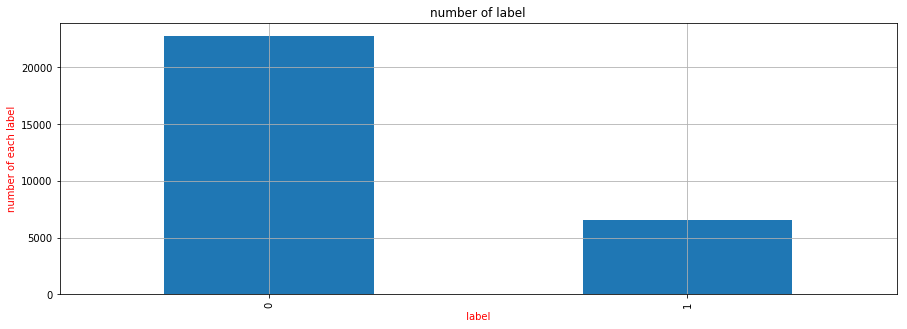

In [96]:
## know number of labels 
plt.figure(figsize = (15,5))
plt.title("number of label")
plt.xlabel(" label " , color = 'red')
plt.ylabel("number of each label" , color = 'red')
df['label'].value_counts().plot(kind = 'bar')
plt.grid()

In [97]:
## data in consistent 
df['label'].value_counts()


0    22796
1     6520
Name: label, dtype: int64

In [98]:
## no null value in data
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
label        0
dtype: int64

In [16]:
## duplcated 5000 row from label 1 two times to make data consistent

df1 = df[df['label'] == 1][:5500]
df2 = df[df['label'] == 1][:5000]

result = df.append([df1,df2] , sort =False)

result['label'].value_counts()



0    22796
1    17020
Name: label, dtype: int64

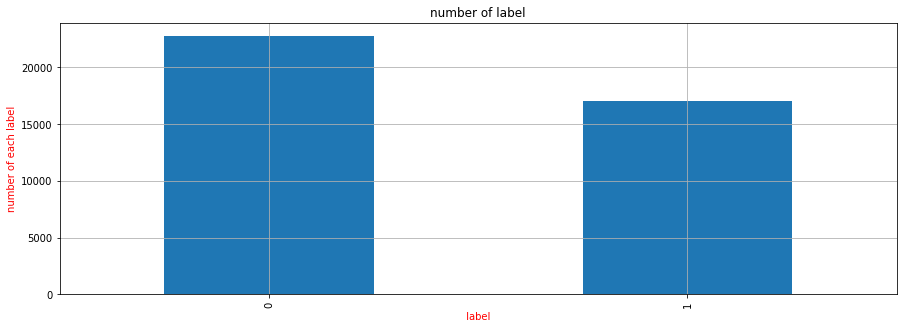

In [17]:
## know number of labels 
plt.figure(figsize = (15,5))
plt.title("number of label")
plt.xlabel(" label " , color = 'red')
plt.ylabel("number of each label" , color = 'red')
result['label'].value_counts().plot(kind = 'bar')
plt.grid()

In [18]:
result.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
label        0
dtype: int64

In [19]:
result.shape

(39816, 24)

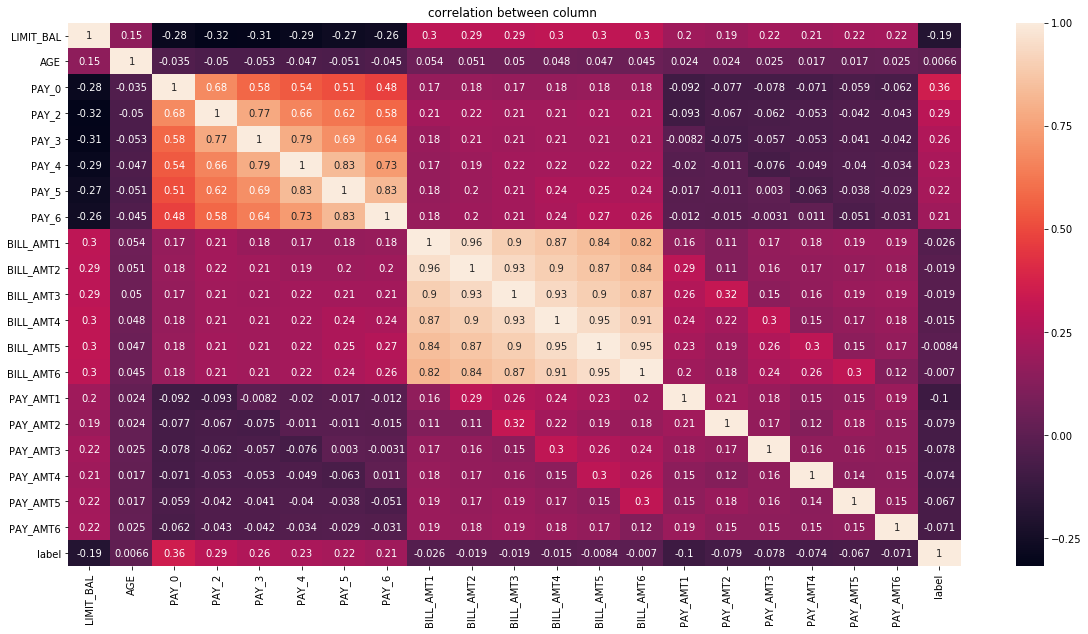

In [20]:
plt.figure(figsize = (20,10))
plt.title("correlation between column ")
plt.xlabel(" feature " , color = 'red')
plt.ylabel("feature" , color = 'red')
sns.heatmap(result.corr() , annot =True)

In [21]:
result.describe()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label
count,39816.000000,39816.000000,39816.000000,39816.000000,39816.000000,39816.000000,39816.000000,39816.000000,39816.000000,39816.000000,...,39816.000000,39816.000000,39816.000000,39816.000000,3.981600e+04,39816.000000,39816.000000,39816.000000,39816.000000,39816.000000
mean,158054.024513,35.420158,0.166416,0.026346,-0.022981,-0.095539,-0.145444,-0.178571,50140.989703,48401.556234,...,42751.966320,40104.600136,38749.114376,5027.917797,5.224983e+03,4670.105812,4378.701376,4407.606691,4701.352044,0.427466
std,127359.657953,9.585144,1.236814,1.313397,1.308038,1.281174,1.251504,1.262112,72981.738218,70726.770260,...,63887.970649,60723.220137,59406.202417,14403.690476,1.995373e+04,15483.999308,14482.396375,14588.471714,16545.760181,0.494717
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3456.000000,2958.250000,...,2333.750000,1738.000000,1261.000000,493.000000,4.190000e+02,274.750000,100.000000,80.750000,0.000000,0.000000
50%,130000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21588.000000,20801.500000,...,19078.000000,18281.000000,17461.500000,2000.000000,2.000000e+03,1600.000000,1310.000000,1400.000000,1300.000000,0.000000
75%,230000.000000,41.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64167.250000,61600.500000,...,52540.000000,49482.000000,48726.000000,4900.000000,4.599000e+03,4000.000000,3790.000000,3856.000000,3700.000000,1.000000
max,1000000.000000,267.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,528897.000000,426529.000000,528666.000000,1.000000


In [22]:
## removing outliers 

def remove_outliers(column,result):
    
    plt.figure(figsize=(20,10))
    plt.subplots(1, 2)
    print("Number of samples before: {}".format(result.shape[0]))

    plt.subplot(121)
    result.boxplot(column)
    plt.title('before removing outliers')
    
    # Save the quartiles
    citation_count_sum_25 = np.percentile(result[column], 25)
    citation_count_sum_50 = np.percentile(result[column], 50)
    citation_count_sum_75 = np.percentile(result[column], 75)
    # Calculate the thresholds
    IQR_citation_count_sum = citation_count_sum_75 - citation_count_sum_25
    Lower_Limit = citation_count_sum_50 - IQR_citation_count_sum * 1.5
    Upper_Limit = citation_count_sum_50 + IQR_citation_count_sum * 1.5

    # Remove the outliers
    result = result.loc[(result[column] > Lower_Limit) & (result[column] < Upper_Limit)]
    
    
    plt.subplot(122)
    result.boxplot(column)
    plt.title('after removing outliers')        
    print("Number of samples before: {}".format(result.shape[0]))
    return result     

In [23]:
## list numeric column in dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = result.select_dtypes(include=numerics)
newdf = list(newdf)
print(newdf)

['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'label']


Number of samples before: 39816
Number of samples before: 38072
Number of samples before: 38072
Number of samples before: 35770


<Figure size 1440x720 with 0 Axes>

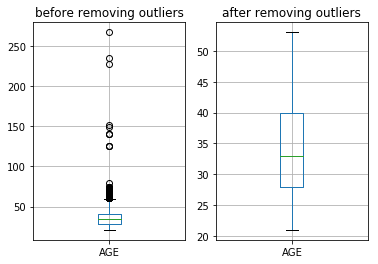

<Figure size 1440x720 with 0 Axes>

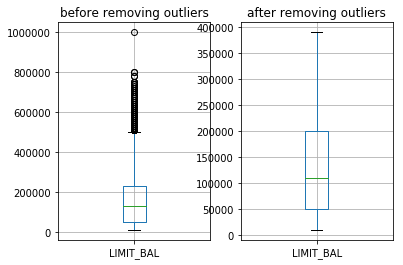

In [24]:
## remove outliers from this column
result = remove_outliers("AGE" , result)
result = remove_outliers("LIMIT_BAL" , result)




In [25]:
result['label'].value_counts()

0    20156
1    15614
Name: label, dtype: int64

In [26]:
# Frequency tables for each categorical feature
for column in result.select_dtypes(include=['object']).columns:
    
    display(pd.crosstab(index=result[column], columns='% observations', normalize='columns')*100)

col_0,% observations
SEX,
female,60.206877
male,39.793123


col_0,% observations
EDUCATION,
0,0.039139
graduate school,33.589600
high school,16.237070
others,0.327090
university,49.807101


col_0,% observations
MARRIAGE,
0,0.159351
married,44.503774
single,55.336874


In [27]:
## drop [o] from data
result['EDUCATION'].value_counts()

university         17816
graduate school    12015
high school         5808
others               117
0                     14
Name: EDUCATION, dtype: int64

In [28]:
## drop [0] from MARRIAGE
result.drop(result.loc[result['EDUCATION']== '0'].index, inplace=True)
result.shape

(35756, 24)

In [29]:
## drop [0] from MARRIAGE
result.drop(result.loc[result['MARRIAGE']== '0'].index, inplace=True)
result.shape

(35699, 24)

In [30]:
result['EDUCATION'].value_counts()

university         17809
graduate school    12011
high school         5762
others               117
Name: EDUCATION, dtype: int64

In [31]:
result_copy = result.copy()
result_copy.shape

(35699, 24)

In [32]:
result.columns

Index([u'LIMIT_BAL', u'SEX', u'EDUCATION', u'MARRIAGE', u'AGE', u'PAY_0',
       u'PAY_2', u'PAY_3', u'PAY_4', u'PAY_5', u'PAY_6', u'BILL_AMT1',
       u'BILL_AMT2', u'BILL_AMT3', u'BILL_AMT4', u'BILL_AMT5', u'BILL_AMT6',
       u'PAY_AMT1', u'PAY_AMT2', u'PAY_AMT3', u'PAY_AMT4', u'PAY_AMT5',
       u'PAY_AMT6', u'label'],
      dtype='object')

In [33]:
features =['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [34]:
y = result['label'].values
x = result[features]

In [35]:
print(x.shape)

(35699, 23)


<a> <h1> Feature Engineering </h1> </a>

1. feature seletion

2. feature extraction

In [36]:
## dummies x

feature = pd.get_dummies(x)
label = y.copy()

In [37]:
feature.shape

(35699, 28)

In [38]:
## Standard Scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_scaled = scaler.fit_transform(feature)


/home/ec2-user/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [39]:
## feature selection and drop high correlation

import statsmodels.api as sm

def backwardElimination(x, SL):
    numVars = len(x[0])
    temp = np.zeros((x.shape[0],x.shape[1])).astype(int)
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        adjR_before = regressor_OLS.rsquared_adj.astype(float)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    temp[:,j] = x[:, j]
                    x = np.delete(x, j, 1)
                    tmp_regressor = sm.OLS(y, x).fit()
                    adjR_after = tmp_regressor.rsquared_adj.astype(float)
                    if (adjR_before >= adjR_after):
                        x_rollback = np.hstack((x, temp[:,[0,j]]))
                        x_rollback = np.delete(x_rollback, j, 1)
                        print (regressor_OLS.summary())
                        return x_rollback
                    else:
                        continue
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = np.append(arr = np.ones((feature.shape[0],1)).astype(int), values=feature, axis=1)  
X_Modeled = backwardElimination(X_opt, SL)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     312.2
Date:                Wed, 18 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:28:17   Log-Likelihood:                -22614.
No. Observations:               35699   AIC:                         4.527e+04
Df Residuals:                   35677   BIC:                         4.546e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1836      0.007     25.248      0.0

In [40]:
X_Modeled = X_Modeled[: , 1: ]
X_Modeled.shape

(35699, 24)

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_scaled, label, test_size=0.2,shuffle =True, random_state=42)



In [71]:
print(" train size is : " ,X_train.shape)
print(" train label is : " ,y_train.shape)
print(" test size is : " ,X_test.shape)
print(" test label is : " ,y_test.shape)

(' train size is : ', (28559, 28))
(' train label is : ', (28559,))
(' test size is : ', (7140, 28))
(' test label is : ', (7140,))


<a> <h1> Model  </h1> </a>

In [43]:
##import libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

<a> <h1> logistic regression classifier </h1> </a>

('accuracy on test data is : ', 0.7086834733893558)
              precision    recall  f1-score   support

           0       0.69      0.87      0.77      3975
           1       0.76      0.50      0.60      3165

   micro avg       0.71      0.71      0.71      7140
   macro avg       0.72      0.69      0.69      7140
weighted avg       0.72      0.71      0.70      7140



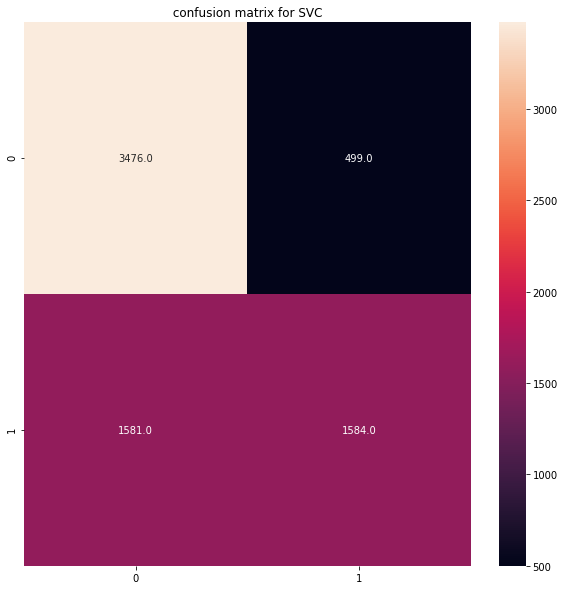

In [45]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression( penalty = 'l1', C = 0.001 ,random_state=0)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)
print("accuracy on test data is : " , accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.title(" confusion matrix for SVC ")
sns.heatmap(cm , annot =True , fmt="0.1f")

<a> <h1> Decision Tree  </h1> </a>

('accuracy on test data is : ', 0.861764705882353)
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      3975
           1       0.79      0.95      0.86      3165

   micro avg       0.86      0.86      0.86      7140
   macro avg       0.87      0.87      0.86      7140
weighted avg       0.88      0.86      0.86      7140



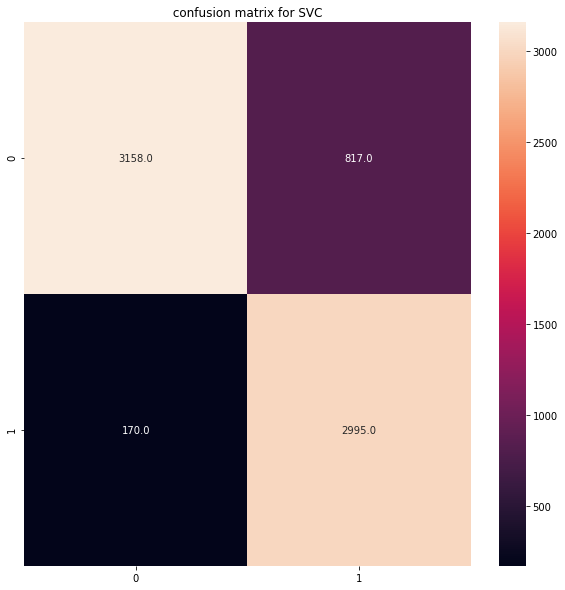

In [54]:
## random forest 
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy' , max_depth=120, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("accuracy on test data is : " , accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.title(" confusion matrix for SVC ")
sns.heatmap(cm , annot =True , fmt="0.1f")


<a> <h1> Gradiant boosting classifier  </h1> </a>

('accuracy on test data is : ', 0.7259103641456582)
              precision    recall  f1-score   support

           0       0.70      0.88      0.78      3975
           1       0.78      0.54      0.63      3165

   micro avg       0.73      0.73      0.73      7140
   macro avg       0.74      0.71      0.71      7140
weighted avg       0.74      0.73      0.72      7140



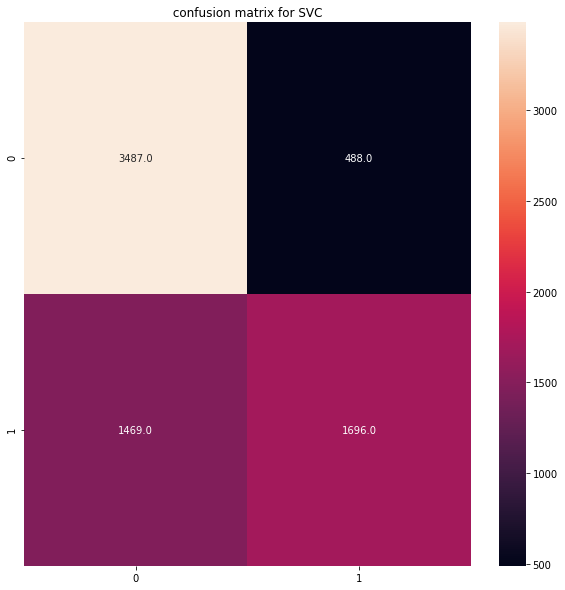

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(learning_rate = 0.01 ,max_depth = 5 , random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)
print("accuracy on test data is : " , accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.title(" confusion matrix for SVC ")
sns.heatmap(cm , annot =True , fmt="0.1f")


<a> <h1> Deep learning  </h1> </a>

In [49]:
!pip install --upgrade pip
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc0#egg=keras-tuner-1.0.2rc0


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
  Using cached https://files.pythonhosted.org/packages/cb/28/91f26bd088ce8e22169032100d4260614fc3da435025ff389ef1d396a433/pip-20.2.4-py2.py3-none-any.whl
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3
DEPRECATION: Python 2.7 reached the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 is no longer maintained. pip 21.0 will drop support for Python 2.7 in January 2021. More details about Python 2 support in pip can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support pip 21.0 will remove support for this functionalit

In [83]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report



In [72]:
X_train.shape

(28559, 28)

In [73]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=28, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test) , verbose=0 )

y_pred = model.predict(X_test)


In [76]:
model.evaluate(X_test, y_test)[1]


7140/7140 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 0s 41us/step


0.726890756302521

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.77      3975
           1       0.74      0.59      0.66      3165

   micro avg       0.73      0.73      0.73      7140
   macro avg       0.73      0.71      0.72      7140
weighted avg       0.73      0.73      0.72      7140



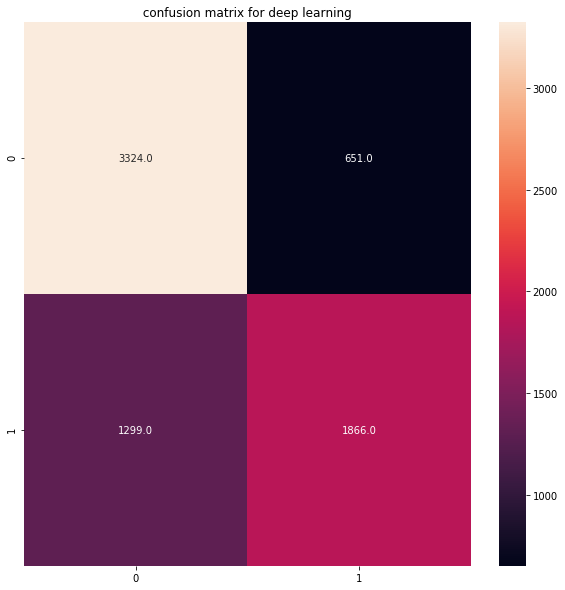

In [80]:
y_pred =(y_pred>0.5)
list(y_pred)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
plt.title(" confusion matrix for deep learning ")
sns.heatmap(cm , annot =True , fmt="0.1f")

<a> <h1> HyperParameter Tunning </h1> </a>

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn import svm

<a> <h1> Grid Search for logistic regression  </h1> </a>

In [47]:
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

# logreg=LogisticRegression()

logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/home/ec2-user/anaconda3/envs/tensorflow_p27/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


('tuned hpyerparameters :(best parameters) ', {'penalty': 'l1', 'C': 0.01})
('accuracy :', 0.7109142476977485)


<a> <h1> Grid Search for decision Tree  </h1> </a>

In [60]:
from sklearn.tree import DecisionTreeClassifier
tree_para = {'criterion':['gini','entropy'],
             'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train, y_train)

clf.best_params_


{'criterion': 'entropy', 'max_depth': 120}

<a> <h1> Grid Search for Gradiant boosting classifier  </h1> </a>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#creating Scoring parameter: 
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),'recall':make_scorer(recall_score)}

# A sample parameter

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
#     "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(), parameters,scoring=scoring,refit=False,cv=2, n_jobs=-1)

clf.fit(X_train,y_train)


print(clf.best_params_)
print(clf.best_score_)

<a> <h1> grid search for Deep learning  </h1> </a>

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),input_dim=30,
                               activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=3,
    directory='project',
    project_name='Air Quality Index')

In [ ]:
tuner.search(X_train, y_train,epochs=15 , validation_data=(X_test, y_test))

<a>  <h1> Final Model </h1> </a>

In [109]:
features =['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

## final model using gradient boosting but drop some label from 0 to make data is palanced

df.shape
df1 = df[df['label'] == 0][:8000]
df2 = df[df['label'] == 1][:]

new_df = pd.concat([df1, df2])
new_df.shape

y = new_df['label'].values
x = new_df[features]

## dummies x

feature = pd.get_dummies(x)
label = y.copy()

## Standard Scaler 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_scaled = scaler.fit_transform(feature)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_scaled, label, test_size=0.1,shuffle =True, random_state=42)

print(" train size is : " ,X_train.shape)
print(" train label is : " ,y_train.shape)
print(" test size is : " ,X_test.shape)
print(" test label is : " ,y_test.shape)

(' train size is : ', (13068, 30))
(' train label is : ', (13068,))
(' test size is : ', (1452, 30))
(' test label is : ', (1452,))


In [113]:
from sklearn.ensemble import GradientBoostingClassifier

# A sample parameter

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "n_estimators":[10]
    }
#passing the scoring function in the GridSearchCV
clf = GridSearchCV(GradientBoostingClassifier(), parameters,refit=False,cv=2, n_jobs=-1)

clf.fit(X_train,y_train)


print(clf.best_params_)
print(clf.best_score_)

{'max_features': 'sqrt', 'n_estimators': 10, 'learning_rate': 0.15, 'criterion': 'friedman_mse', 'max_depth': 5}
0.7201561065197429


('accuracy on test data is : ', 0.7086776859504132)
              precision    recall  f1-score   support

           0       0.68      0.87      0.76       773
           1       0.78      0.52      0.63       679

   micro avg       0.71      0.71      0.71      1452
   macro avg       0.73      0.70      0.69      1452
weighted avg       0.73      0.71      0.70      1452



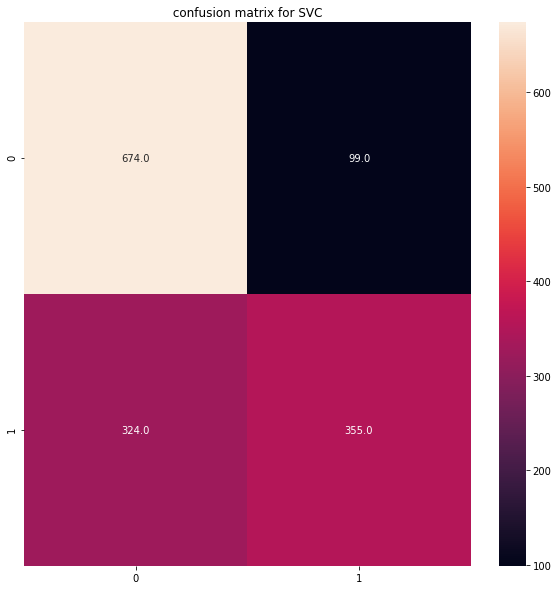

In [121]:

from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier( max_features = 'sqrt', learning_rate =  0.15,  n_estimators = 10,
                                 criterion = 'friedman_mse',
                                 max_depth = 5 , random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
train_pred = clf.predict(X_train)
print("accuracy on test data is : " , accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.title(" confusion matrix for SVC ")
sns.heatmap(cm , annot =True , fmt="0.1f")

<a> <h1> summary </h1> </a>

 #### after exploring data and cleaning it 
 
 * data has outliers so i drop it to improve accuracy 
 
 * data has duplicated so i drop it 
 
 * applying standard scaler on data 
 
 * i notice that label of data was impalanced so make data augmentation 
 
 * using (backword Elimination) for feature selection it drop high correlated 
 
 * apply logisic regression classifier and give me low accuracy 
 
* using gridsearch to hyperparameter tunning on algorithm 

### the best algorithm give me the best accuracy was decession tree after hyperparameter tunning using grid search 


##### grid search take very long time so i didn't use it in gridiant boosting and deep learning

### notice through experiments

1- data augmentation improve accuracy 

2- standard scaler improve accuracy 

3- feature selection and Hyperparameter tunning improve accuracy 

4- decesion tree the best algorithm in this problem 

